# Global C2C Fashion Store Analysis

### Importing Libraries and Datasets

In [153]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [154]:
# importing the datasets
user_level_data = pd.read_csv("dataset/6M-0K-99K.users.dataset.public.csv")
buyer_by_country = pd.read_csv("dataset/Buyers-repartition-by-country.csv")
seller_by_gender = pd.read_csv("dataset/Comparison-of-Sellers-by-Gender-and-Country.csv")
country_top_sellers = pd.read_csv("dataset/Countries-with-Top-Sellers-(Fashion-C2C).csv")
country_code = pd.read_csv("dataset/country_code.csv")

In [155]:
# user level data
user_level_data.head(10)

,index,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,2,9006282053848196165,user,Suède,en,3,8,0,0,0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,4,2858299215060733023,user,France,en,3,8,0,0,0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr
5,5,-8370972521561479983,user,Royaume-Uni,en,3,8,0,0,0,...,mrs,False,False,False,True,709,3205,106.83,8.9,gb
6,6,-7877915015908472168,user,Royaume-Uni,en,3,8,4,0,0,...,mrs,False,False,False,True,591,3205,106.83,8.9,gb
7,7,7455841332634807036,user,Italie,fr,3,8,0,0,0,...,mrs,True,True,False,True,709,3205,106.83,8.9,it
8,8,4607255007288453096,user,Italie,fr,3,8,0,0,0,...,mrs,True,True,False,True,701,3205,106.83,8.9,it
9,9,-7302797141205914253,user,France,en,3,8,0,0,0,...,mr,True,False,True,True,703,3205,106.83,8.9,fr


In [156]:
# buyer level data
buyer_by_country.head(10)

,index,country,buyers,topbuyers,topbuyerratio,femalebuyers,malebuyers,topfemalebuyers,topmalebuyers,femalebuyersratio,...,meanproductsliked,topmeanproductsbought,topmeanproductswished,topmeanproductsliked,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,0,France,1251,53,4.2,851,400,33,20,68.0,...,20.2,28.1,77.2,120.9,321.8,75.0,4.8,8.8,10.1,11.0
1,1,Royaume-Uni,792,38,4.8,560,232,30,8,70.7,...,29.5,22.4,161.2,193.7,298.3,68.2,5.4,8.8,11.1,12.2
2,2,Etats-Unis,912,31,3.4,700,212,21,10,76.8,...,32.8,27.9,119.4,224.1,359.3,73.0,4.9,9.7,11.7,27.9
3,3,Allemagne,578,29,5.0,409,169,21,8,70.8,...,41.1,17.8,175.7,367.2,296.6,39.3,5.1,8.6,11.2,11.3
4,4,Italie,400,21,5.3,283,117,14,7,70.8,...,35.5,24.7,208.4,103.4,247.9,40.9,6.4,11.6,14.3,15.4
5,5,Espagne,255,21,8.2,189,66,18,3,74.1,...,65.0,26.6,222.5,427.8,271.1,39.4,7.0,9.5,17.6,11.6
6,6,Pays-Bas,144,15,10.4,118,26,10,5,81.9,...,42.7,19.7,72.3,166.5,191.6,14.3,6.3,9.0,17.7,10.5
7,7,Suède,151,11,7.3,113,38,7,4,74.8,...,67.9,21.3,169.3,423.5,189.1,86.0,7.4,9.1,20.2,9.5
8,8,Finlande,64,10,15.6,53,11,9,1,82.8,...,55.7,21.2,50.2,87.4,184.9,121.1,6.7,9.2,10.3,12.5
9,9,Danemark,157,9,5.7,127,30,9,0,80.9,...,168.2,15.7,228.8,388.8,156.0,19.3,5.6,8.6,11.7,9.7


In [157]:
# sellers by gender
seller_by_gender.head(10)

,index,country,sex,nbsellers,meanproductssold,meanproductslisted,meansellerpassrate,totalproductssold,totalproductslisted,meanproductsbought,meanproductswished,meanproductsliked,totalbought,totalwished,totalproductsliked,meanfollowers,meanfollows,percentofappusers,percentofiosusers,meanseniority
0,0,Allemagne,Female,116,4.03,2.72,27.33,468,315,3.05,34.66,35.28,354,4021,4092,9.5,8.9,54.0,49.0,3060.336207
1,1,Allemagne,Male,34,2.00,1.00,19.15,68,34,1.62,3.38,31.79,55,115,1081,7.8,8.4,79.0,64.0,3089.058824
2,2,Arménie,Female,1,0.00,25.00,0.00,0,25,0.00,0.00,1.00,0,0,1,4.0,8.0,NaN,NaN,3201.000000
3,3,Australie,Female,18,0.94,1.33,10.44,17,24,6.11,17.72,209.28,110,319,3767,7.5,9.3,55.0,55.0,3103.666667
4,4,Australie,Male,3,6.00,4.00,33.33,18,12,8.00,24.00,38.33,24,72,115,12.7,8.3,66.0,66.0,3085.666667
5,5,Autriche,Female,18,3.28,2.50,38.67,59,45,3.39,31.94,33.00,61,575,594,6.9,8.4,61.0,50.0,3048.222222
6,6,Autriche,Male,5,1.60,0.20,35.00,8,1,0.80,5.00,0.80,4,25,4,6.2,8.0,60.0,60.0,3133.000000
7,7,Bahamas,Female,1,1.00,0.00,0.00,1,0,0.00,0.00,0.00,0,0,0,4.0,8.0,NaN,NaN,2857.000000
8,8,Belgique,Female,37,2.41,1.89,29.59,89,70,12.03,57.24,20.11,445,2118,744,8.3,8.5,62.0,48.0,3041.081081
9,9,Belgique,Male,8,3.13,1.75,26.13,25,14,0.63,1.13,1.25,5,9,10,8.4,9.3,62.0,37.0,3069.625000


In [158]:
# top sellers per country
country_top_sellers.head(10)

,index,country,sellers,topsellers,topsellerratio,femalesellersratio,topfemalesellersratio,femalesellers,malesellers,topfemalesellers,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,0,Taiwan,1,1,100.0,100.0,100.0,1,0,1,...,57.000000,56.000000,57.000000,56.000000,11.0,11.0,83.0,8.0,83.0,8.0
1,1,Slovaquie,2,1,50.0,0.0,0.0,0,2,0,...,27.000000,14.000000,14.000000,7.000000,17.0,15.0,10.5,8.5,15.0,8.0
2,2,Lettonie,4,2,50.0,100.0,100.0,4,0,2,...,40.500000,18.000000,20.750000,9.000000,120.3,11.5,21.0,52.3,38.0,98.5
3,3,Bulgarie,9,4,44.4,66.7,100.0,6,3,4,...,36.250000,17.250000,18.888889,9.111111,98.3,19.0,28.6,31.6,46.3,19.0
4,4,Chypre,4,1,25.0,100.0,100.0,4,0,1,...,41.000000,66.000000,14.000000,20.250000,17.3,11.0,21.3,10.3,39.0,17.0
5,5,Monaco,5,1,20.0,100.0,100.0,5,0,1,...,170.000000,19.000000,38.000000,5.200000,51.6,12.0,39.6,8.0,167.0,8.0
6,6,Roumanie,13,2,15.4,76.9,50.0,10,3,1,...,24.500000,19.500000,5.230769,5.923077,121.6,11.0,10.9,11.5,30.0,32.0
7,7,Luxembourg,7,1,14.3,85.7,100.0,6,1,1,...,30.000000,0.000000,6.142857,1.142857,73.6,11.0,15.9,8.4,52.0,3.0
8,8,Espagne,119,13,10.9,81.5,76.9,97,22,10,...,46.692308,23.153846,8.319328,4.991597,202.4,30.5,16.1,14.6,53.2,14.5
9,9,Italie,347,35,10.1,71.5,65.7,248,99,23,...,39.685714,30.771429,8.126801,6.391931,141.8,26.5,16.1,54.6,63.4,429.3


### Pre-processing

In [159]:
# convert country code table into lower case
country_code["Name"] = country_code["Name"].apply(lambda x: str(x).lower())
country_code["Code"] = country_code["Code"].apply(lambda x: str(x).lower())

In [160]:
country_code.head()

,Name,Code
0,afghanistan,af
1,ã…land islands,ax
2,albania,al
3,algeria,dz
4,american samoa,as


In [161]:
# checking no null values
user_level_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                98913 non-null  int64  
 1   identifierHash       98913 non-null  int64  
 2   type                 98913 non-null  object 
 3   country              98913 non-null  object 
 4   language             98913 non-null  object 
 5   socialNbFollowers    98913 non-null  int64  
 6   socialNbFollows      98913 non-null  int64  
 7   socialProductsLiked  98913 non-null  int64  
 8   productsListed       98913 non-null  int64  
 9   productsSold         98913 non-null  int64  
 10  productsPassRate     98913 non-null  float64
 11  productsWished       98913 non-null  int64  
 12  productsBought       98913 non-null  int64  
 13  gender               98913 non-null  object 
 14  civilityGenderId     98913 non-null  int64  
 15  civilityTitle        98913 non-null 

In [162]:
# adding country names in english
user_level_data = pd.merge(user_level_data, 
                           country_code, 
                           left_on="countryCode",
                           right_on="Code",
                           how="left")

In [163]:
user_level_data.head()

,index,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,Name,Code
0,0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,...,False,False,True,709,3205,106.83,8.9,us,united states,us
1,1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,...,False,False,True,709,3205,106.83,8.9,de,germany,de
2,2,9006282053848196165,user,Suède,en,3,8,0,0,0,...,False,True,True,689,3205,106.83,8.9,se,sweden,se
3,3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,...,False,False,True,709,3205,106.83,8.9,tr,turkey,tr
4,4,2858299215060733023,user,France,en,3,8,0,0,0,...,False,True,True,709,3205,106.83,8.9,fr,france,fr


In [164]:
# checking no null values
buyer_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      62 non-null     int64  
 1   country                    62 non-null     object 
 2   buyers                     62 non-null     int64  
 3   topbuyers                  62 non-null     int64  
 4   topbuyerratio              62 non-null     float64
 5   femalebuyers               62 non-null     int64  
 6   malebuyers                 62 non-null     int64  
 7   topfemalebuyers            62 non-null     int64  
 8   topmalebuyers              62 non-null     int64  
 9   femalebuyersratio          62 non-null     float64
 10  topfemalebuyersratio       33 non-null     float64
 11  boughtperwishlistratio     57 non-null     float64
 12  boughtperlikeratio         60 non-null     float64
 13  topboughtperwishlistratio  32 non-null     float64
 

In [165]:
# checking no null values
seller_by_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                73 non-null     int64  
 1   country              70 non-null     object 
 2   sex                  72 non-null     object 
 3   nbsellers            73 non-null     int64  
 4   meanproductssold     73 non-null     float64
 5   meanproductslisted   73 non-null     float64
 6   meansellerpassrate   73 non-null     float64
 7   totalproductssold    73 non-null     int64  
 8   totalproductslisted  73 non-null     int64  
 9   meanproductsbought   73 non-null     float64
 10  meanproductswished   73 non-null     float64
 11  meanproductsliked    73 non-null     float64
 12  totalbought          73 non-null     int64  
 13  totalwished          73 non-null     int64  
 14  totalproductsliked   73 non-null     int64  
 15  meanfollowers        73 non-null     float

In [166]:
# checking no null values
country_top_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   19 non-null     int64  
 1   country                 19 non-null     object 
 2   sellers                 19 non-null     int64  
 3   topsellers              19 non-null     int64  
 4   topsellerratio          19 non-null     float64
 5   femalesellersratio      19 non-null     float64
 6   topfemalesellersratio   19 non-null     float64
 7   femalesellers           19 non-null     int64  
 8   malesellers             19 non-null     int64  
 9   topfemalesellers        19 non-null     int64  
 10  topmalesellers          19 non-null     int64  
 11  countrysoldratio        19 non-null     float64
 12  bestsoldratio           18 non-null     float64
 13  toptotalproductssold    19 non-null     int64  
 14  totalproductssold       19 non-null     int6

<b>Observation:</b> All the four tables have non-null data points.

### Exploratory Data Analysis

<b>Unique number of users in the dataset</b>

In [167]:
# unique number of users in the dataset
print(len(user_level_data.identifierHash.unique()))

98913


Distribution of users by country

In [168]:
user_by_country = user_level_data.groupby(by=['Name']).agg({'identifierHash':['count']})
user_by_country.columns = ['_'.join(col) for col in user_by_country.columns.values]
user_by_country.sort_values(by = ["identifierHash_count"], ascending=False)

,identifierHash_count
Name,
france,25135
united states,20602
united kingdom,11310
italy,8015
germany,6567
...,...
sri lanka,1
suriname,1
svalbard and jan mayen,1


In [169]:
user_by_country = user_by_country.reset_index()
fig = px.choropleth(
    data_frame=user_by_country,
    locations="Name",
    locationmode="country names",
    color="identifierHash_count",
    color_continuous_scale="Blues",
    range_color=[0, 600],
    title="Users by Country"
)
fig.show()

<b>Social Media followers/following per users</b>

In [170]:
user_level_data.columns

Index(['index', 'identifierHash', 'type', 'country', 'language',
       'socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought', 'gender', 'civilityGenderId', 'civilityTitle',
       'hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture',
       'daysSinceLastLogin', 'seniority', 'seniorityAsMonths',
       'seniorityAsYears', 'countryCode', 'Name', 'Code'],
      dtype='object')

In [171]:
# removing outlier from the dataset
user_followers = user_level_data.groupby(by=['socialNbFollowers']).agg({'identifierHash':['count']})
user_followers.columns = ["_".join(i) for i in user_followers.columns.values]
outliers = user_followers.query('identifierHash_count < 6').index.values
user_level_data_wo_follower_outlier = user_level_data.query("socialNbFollowers not in @outliers ")
px.histogram(user_level_data_wo_follower_outlier, x="socialNbFollowers")

In [172]:
user_following = user_level_data.groupby(by=['socialNbFollows']).agg({'identifierHash':['count']})
user_following.columns = ["_".join(x) for x in user_following.columns.values]
outliers = user_following.query('identifierHash_count < 6').index.values
user_level_data_wo_following_outlier = user_level_data.query("socialNbFollowers not in @outliers ")
px.histogram(user_level_data_wo_follower_outlier, x="socialNbFollows")

Gender wise distribution of users on the website

<AxesSubplot:xlabel='civilityTitle', ylabel='identifierHash_count'>

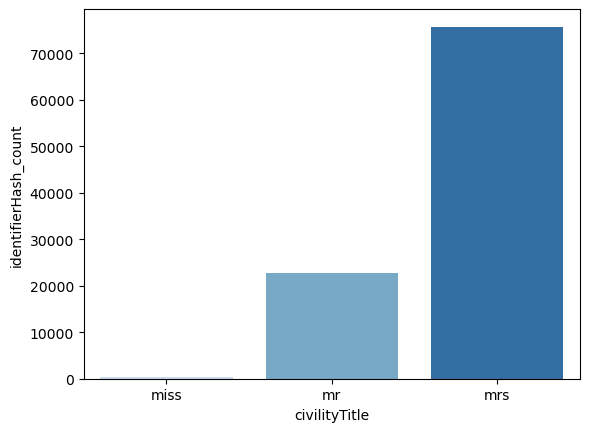

In [174]:
gender_wise_distribution = user_level_data.groupby(by=["civilityTitle"]).agg({'identifierHash':['count']})
gender_wise_distribution.columns = ["_".join(x) for x in gender_wise_distribution.columns.values]
gender_wise_distribution = gender_wise_distribution.reset_index()
sns.barplot(gender_wise_distribution, y='identifierHash_count', x="civilityTitle", palette="Blues")

<b>Conclusion:</b> Majority of the users on the platfrom are women. There are a small number of women who are unmarried. So, In general majority of the users on the platform are married women.

<b>Product Listed vs Products Sold</b>

Country wise products listed by unique users

In [228]:
# countrywise average product listed
temp = user_level_data.copy()
temp["posted_at_least_1"] = temp["productsListed"].apply(lambda x: 0 if x==0 else 1)
country_wise_user_product_listed = temp.groupby(by=["Name"]).agg({"posted_at_least_1":["mean"]})
country_wise_user_product_listed.columns = ["_".join(x) for x in country_wise_user_product_listed.columns.values]

# average countrywise product listed and sold
country_wise_user_product_listed_avg = user_level_data.groupby(by=["Name"]).agg({"productsListed":["mean"]})
country_wise_user_product_listed_avg.columns = ["_".join(x) for x in country_wise_user_product_listed_avg.columns.values]

In [229]:
country_wise_user_product_listed_avg = country_wise_user_product_listed_avg.reset_index()
print(country_wise_user_product_listed_avg.columns)
fig = px.choropleth(
    data_frame=country_wise_user_product_listed_avg,
    locations="Name",
    locationmode="country names",
    color="productsListed_mean",
    color_continuous_scale="Blues",
    range_color=[0, 10],
    title="Users by Country"
)
fig.show()

Index(['Name', 'productsListed_mean'], dtype='object')


In [205]:
# countrywise percentage of users listing products
country_wise_user_product_listed.sort_values(by=['posted_at_least_1_mean'],ascending=False)

,posted_at_least_1_mean
Name,
monaco,0.111111
bulgaria,0.097561
cyprus,0.090909
iceland,0.080000
lithuania,0.075000
...,...
guam,0.000000
guatemala,0.000000
guernsey,0.000000


In [195]:
# countrywise mean user listing products 
country_wise_user_product_listed.sort_values(by=['productsListed_mean'],ascending=False)

,productsListed_mean
Name,
armenia,1.562500
cyprus,1.509091
bulgaria,1.012195
monaco,0.750000
latvia,0.750000
...,...
guam,0.000000
guatemala,0.000000
guernsey,0.000000


In [218]:
country_wise_user_product_listed = country_wise_user_product_listed.reset_index()
fig = px.choropleth(
    data_frame=country_wise_user_product_listed,
    locations="Name",
    locationmode="country names",
    color="posted_at_least_1_mean",
    color_continuous_scale="Blues",
    range_color=[0, 10],
    title="Users by Country"
)
fig.show()

In [181]:
country_wise_user_product_listed.head(10)

productsListed
                                            sum
Name        identifierHash                     
afghanistan -8446013980189860526              0
            -8005041406219332556              0
            -5668440417077830538              0
            -3778353589417346114              0
            -1266799940866634188              0
             823009771168489249               0
             3191224109440361406              0
             3283449236901808879              0
             6648843398410540338              0
             7765645294297469359              0

In [177]:
user_level_data.columns

Index(['index', 'identifierHash', 'type', 'country', 'language',
       'socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought', 'gender', 'civilityGenderId', 'civilityTitle',
       'hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture',
       'daysSinceLastLogin', 'seniority', 'seniorityAsMonths',
       'seniorityAsYears', 'countryCode', 'Name', 'Code'],
      dtype='object')

In [176]:
user_level_data[["productsListed","productsSold","productsPassRate"]]

,productsListed,productsSold,productsPassRate
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0
...,...,...,...
98908,0,0,0.0
98909,0,0,0.0
98910,0,0,0.0
98911,0,0,0.0
